# Propagacion hacia atras (Backpropagation). El Gradiente

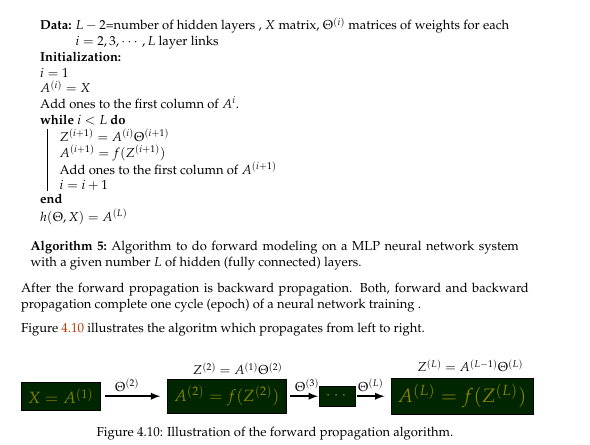

Para hacer backpropagation. 

* Hacemos propagacion hacia adelante. Con esto tenemos los $\Theta$, activacion $A$, los $Z$

* Toamamos  de la funcion de costo , por ejemplo $C(\Theta) = \| h(\Theta, X) - y \|^2$, recuerde que $h(\Theta , X)=A^{(L)}$.

* Recuerde que podemos escribir la funcion de costo como
$$ C(\Theta) = \frac1m \sum_{i=1}^m C_i(\Theta)$$

* Debemos calcular el gradiente para hallar $\Theta$ optimo. Al fin, este $\Theta$ es el que la maquina debe aprender. 

* El proceso, arrancando del funcion de costo se hace hacia atras. 


Nos vamos enforcar en un termino de la suma de arriba.

$$  \frac{\partial C_i(\Theta)}{\partial \theta_{jk}^{\ell}} $$
Es un ternsor de orden 4. Para evitar muchos
indices voy a sobre-escribir $C_i(\Theta)$
Es decir

$$ C(\Theta) ⇐   C_i(\Theta) $$
Estamos finando una muestra de entrada. Luego se suma el resultado para todas las muestras y se divide por $m$.

El gradiente esta dado por

$$ \frac{\partial C(\Theta)}{\partial \theta_{jk}^{\ell}} $$

Para hallar el gradiente vamos a usar la regla de la cadena.
 
 $C(\Theta^{(i)}) $, depdende indirectamente
 de $Z^{(i)}=A^{(i-1)} \Theta^{(i)}$,
 tammbien $A^{(i-1)} = f(Z^{(i-1)})$ hay una
 cadena de dependencia.

 De nuevo, lo escribi a mano alzada. Si perturbamos una celda por un valor $\Delta Z$
 entonces como afecta esto la nueva funcion de costo. 

 $$ A = f(Z+ \Delta Z)$$
 Usamos Taylor de primero orden


 $$C(Z + \Delta Z)  = f(Z) +  \frac{\partial C}{\partial Z} \Delta Z + \text{error} $$

 Sin usar indices. Usando indices


 $$ \frac{\partial C}{\partial z_j^i} \Delta z_j^{\ell}$$

 Nos enfocamos inicialmente en las derivadas parciales de $C$ con respecto a $z_j^{\ell}$


Por simplificacion

$$ d_j^{\ell} = \frac{\partial C}{\partial z_j^{\ell}}$$

Usamos la regla de la cadena en

$$ C(\Theta) = C( a^{(L)} (Z^{(L)}(\Theta))) $$

Comenzamos con, usando la regla de la cadena.

$$ d_j^{L} =   \frac{\partial C}{\partial a_{j}^L} \frac{\partial a_{j}^L}{\partial z_j^{L}}$$

$j$ es fijo. Recuerde que  $a_j^L = f(z_j^L)$.
De forma que $\partial a_j^L / \partial z_j^L = f'(z_j^L)$. Asi que

$$ d_j^L = \frac{\partial C}{\partial a_j^L} f'(z_j^L)$$
Esta ecuacion de forma vectorial la podemos escribir como

$$d^{(L)} = \nabla_{a^L} C \circ f'(z^{(L)})  \quad , \quad (1)  $$









El gradiente de la funcion de costo con respecto a las activaciones es de caraacter analitco y se calcula numericamente. Por que la funcion de costo tiene una ecuacion. Hay una formula para $\partial C/\partial a_j^L$. Tambien conocemos $f'$ que es analitica.

Recuerde que queremos hallar $d_j^{\ell}$ para
$\ell=L-1, L-2, 2$. 

Seguimos usando la regla de la cadena.

$$ d_{j}^{\ell} = \frac{\partial C}{\partial z_j^{\ell}}  = \sum_k \frac{\partial C}{\partial z_{k}^{\ell+1} } \frac{\partial z_k^{\ell +1}}{\partial z_j^{\ell}}= \sum_k d_k^{\ell+1}\frac{\partial z_k^{\ell +1}}{\partial z_j^{\ell}} $$

Observe que $z^{\ell+1}$  es funcion de $z^{\ell}$. Veamos esto de forma explicita.

$$z_k^{\ell +1}  = \sum_p \theta_{kp}^{\ell +1} a_{p}^{\ell} = \sum_p \theta_{kp}^{\ell +1} f(z_p^{\ell})  $$, de forma que

$$ \frac{\partial z_k^{\ell + 1}}{\partial z_{j}^{\ell}}  = \sum_p \theta_{kp}^{\ell +1} f'(z_p^{\ell}) \frac{\partial z_p^{\ell}}{\partial z_j^{\ell} } 
=  \sum_p \theta_{kp}^{\ell +1} f'(z_p^{\ell}) \delta_{pj} = \theta_{kj}^{\ell+1} f'(z_j^{\ell})$$

$$ d_{j}^{\ell} =  \sum_k d_k^{\ell+1}\theta_{kj}^{\ell+1} f'(z_j^{\ell}) $$

Para implementacion (y muchas para mejor entendimiento) escribimos

$$d^{(\ell)} =   d^{\ell+1} \Theta^{\ell+1}\circ f'(z^{\ell})  \quad (2) $$

Ya tenemos la formula recursiva para $\ell = L, L-1, \cdots 2$.

Finalmente , usando la regla de la cadena

\begin{eqnarray}
\frac{\partial C}{\partial \theta_{jk}^{\ell}} &=&
\frac{\partial C}{\partial z_j^{\ell} } \frac{z_j^{\ell}}{\partial \theta_{jk}^{\ell}} \quad, \quad j,\ell \text{   fixed} \\
&=& ?
\end{eqnarray}

Como $z_j^{\ell} = \sum_p \theta_{jp}^{\ell} a_p^{\ell -1} $


Entonces

$$\frac{\partial z_j^{\ell}}{\partial \theta_{jk}^{\ell}} = \sum_p \frac{\partial \theta_{jp}^{\ell} }{\partial \theta_{jk}^{\ell}} a_p^{\ell-1} = \sum_p \delta_{kp} a_p^{\ell-1} = a_k^{\ell-1}$$


de forma que

\begin{eqnarray}
\frac{\partial C}{\partial \theta_{jk}^{\ell}} &=&
\frac{\partial C}{\partial z_j^{\ell} } \frac{z_j^{\ell}}{\partial \theta_{jk}^{\ell}} \quad, \quad j,\ell \text{   fixed} \\
&=& \frac{\partial C}{\partial z_j^{\ell} } a_k^{\ell-1}   \quad , \quad (3)
\end{eqnarray}
Con las ecuaciones (1), (2) y (3) escribimos el algoritmo de propagacion. 


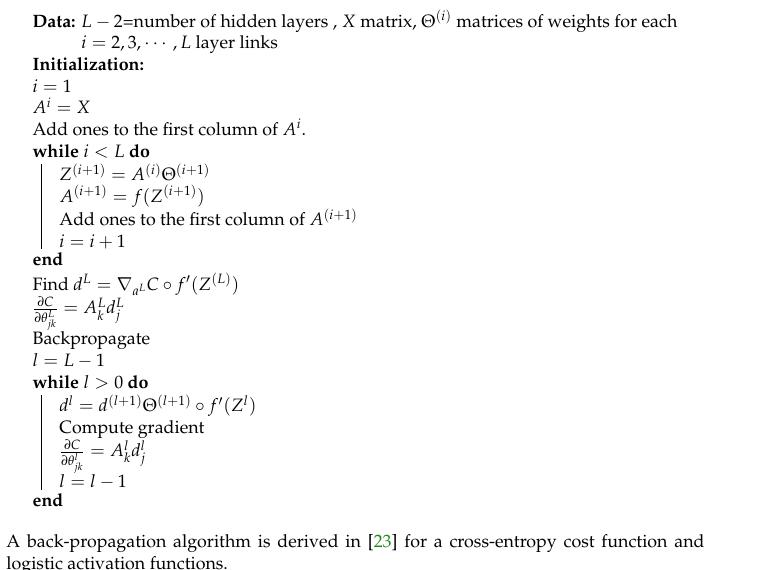

## Desarrollo de un modelo.
Que pasos necesitamos cuando vamos a desarrollar un modelo.

* Conseguir datos
* Pre-proceso
* Construir la arquitectura
* Entrenar el modelo (probar)
* Hacer predicciones

### Consecucion de datos.
Hay una cantidad importante de sitios en la internet para este proposito.

Por ejemplo
[list of datasets for machine-learnig research](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)

Este sitio es "super"completo.

[Papers with code](https://paperswithcode.com/datasets)




En las notas de clase hay mucho mas, aunque algunos son "subconjuntos" de los de arriba.

Si, por ejemplo, quisieramos datos para NLP(Natural Language Processing). Todo Wikipedia es una fuente muy buena de datos, de donde se puede extraer cualquier cantidad de texto para probar algoritmos. Si se quiere probar con videos, hay muchos sitios de internet que te dejan usar videos para pruebas.


Tambien esta la opcion de colectar los datos uno mismo. Por ejemplo tesis de grado necestian trabajo de campo donde se deben tomar fotografias o hacer videos, etc.


### Preprocesamiento de datos
Algunos, pero no todos de los pasos que seguir en el preproceso de datos son:

* Homogeneizar los datos. Por ejemplo se tienen imagenes de distintas resoluciones (32x32, 64x24). Poner todas las imagenes en la misma escala de pixeles $nx \times ny$.

* Normalizacion. Recuerde en ML la normalizacion, restar la media y dividir por la desviacion estandar (estandarizacion), o dividir por la norma del vector y otros metodos.

* Remover los NaN (Not a Number) o remover otro ruido.

Hay muchos mas pasos que se pueden hacer para pre-procesar datos pero cada investigacion  tiene sus condiciones espefificas.

Esta lista es incompleta.

### Construccion de la arquitectura.
Esto puede ser muy complicado. Definir los hiperparametros: $\eta$, numero de capas, numero de nodos por capa, funciones de activacion, funciones de costo, metricas de error, etc.

Requiere experiencia. Muchas veces prueba y error. El sitio, 

Esta el sitio de Google donde se automaiza el proceso. 
[AutoML](https://cloud.google.com/automl)

De esto hablaremos el resto del curso. Veremos arquitecturas famosas que ganaron concursos en Kaggle y en ImageNet.

#### Entrenamiento del modelo

Una vez armada la arquitectura simplemente se corre el modelo para hallar los $\Theta$. Se prueba con datos separados (cross-validation)
Hasta que tenga un porcentaje de exito grande (>90).

#### Hacer predicciones. Salir al mercado y ver como funciona con datos de la calle.

Si no funciona, toca devolvese. 

Con esto concluimos el capitulo de redes neuronlales. Seguimos con el utlimo capitulo que es 

# Deep Learning









